# Linear Regression Diagnostic Plots

In this notebook we will discuss some diagnostic plots for linear regression.

## What we will accomplish

We will:
- Remind ourselves of what a residual is,
- Display residual plots and what they can be used for and
- Give some useful tips and tricks that can help with model building.

In [1]:
import numpy as np
np.random.seed(440)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

## Residual reminder

Suppose we want to regress a variable, $y$, on $m$ features (stored in $X$), then once again recall our model is:

$$
y = X \beta + \epsilon, \text{ where we assume } \epsilon \sim N(0,\sigma) \text{ are independent of } X.
$$

Recall that we refer to $\epsilon$ as random error.

Now suppose we have $n$ observations of $(X^{(i)}, y^{(i)})$, which we use to fit the above model. Then the <i>residuals</i> of the model fit for each observation, $i$, are given by:

$$
y^{(i)} - \hat{y^{(i)}} = X^{(i)}\beta + \epsilon^{(i)} - X^{(i)}\hat{\beta} = X^{(i)}(\beta - \hat{\beta}) + \epsilon^{(i)}.
$$

If our model is good (and our model assumptions hold), then:

$$
y^{(i)} - \hat{y^{(i)}} \approx \epsilon^{(i)}.
$$

To help explain this it may help to recall our image illustrating the simple linear regression model:

<img src="lecture_4_assets/slr_curves.png" width="60%"></img>

and match it up with what we see when we observe some data and estimate the line:

<img src="lecture_4_assets/residual_plot.png" width="60%"></img>



So essentially once we subtract our estimate from our actual we are hopefully left with a bunch of draws from a random normal distribution.

## Residual plots

Given what we just discussed it can be useful to look at these residuals. There are two kinds of plots that are typically investigated.

### Residuals vs. Features

The first plots the residuals against various features. 

#### Missing signal

These sorts of plots are useful for seeing if you are missing some kind of signal in your data, for example by not using a transformation of the feature. We will look at randomly generated data to help illustrate.

In [2]:
## randomly generated data
x = 2*np.random.randn(500)
y = x**2 + 5*np.random.randn(500)

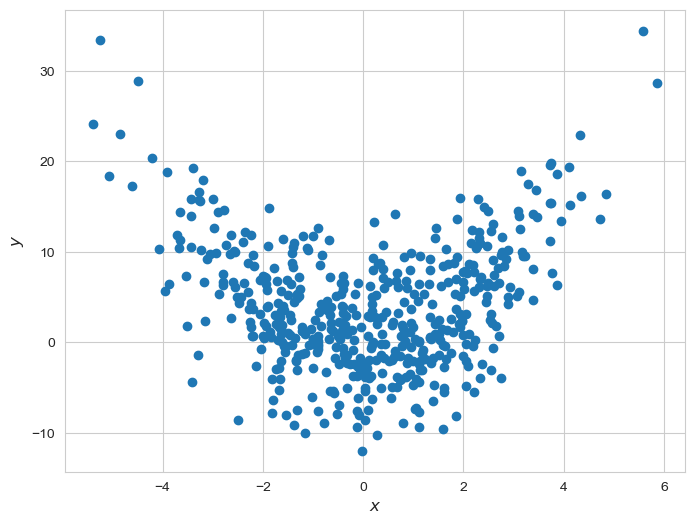

In [3]:
## Visualize that data
plt.figure(figsize=(8,6))

plt.scatter(x, y)

plt.xlabel("$x$", fontsize=12)
plt.ylabel("$y$", fontsize=12)

plt.show()

Let's fit an incorrect simple linear regression model regressing $y$ on $x$ and then plot the residuals.

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
slr = LinearRegression(copy_X=True)

slr.fit(x.reshape(-1,1), y)

residuals = y - slr.predict(x.reshape(-1,1))

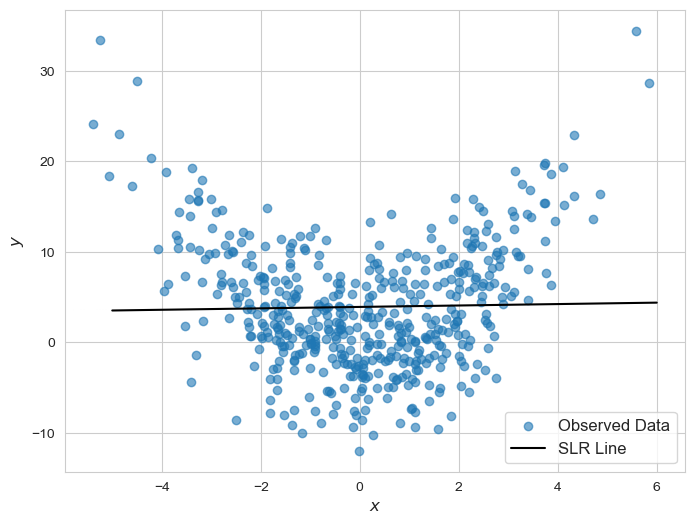

In [6]:
## Visualize that data
plt.figure(figsize=(8,6))

plt.scatter(x, y, 
            label="Observed Data",
            alpha=.6)

plt.plot(np.linspace(-5,6,10),
         slr.predict(np.linspace(-5,6,10).reshape(-1,1)),
         "k",
         label="SLR Line")

plt.xlabel("$x$", fontsize=12)
plt.ylabel("$y$", fontsize=12)

plt.legend(fontsize=12)

plt.show()

From the above plot we can see that observations near the end of the $x$ interval are greatly underestimated while observations in the middle of the $x$ interval tend to be overestimated. This should result in a residual plot with a stark pattern.

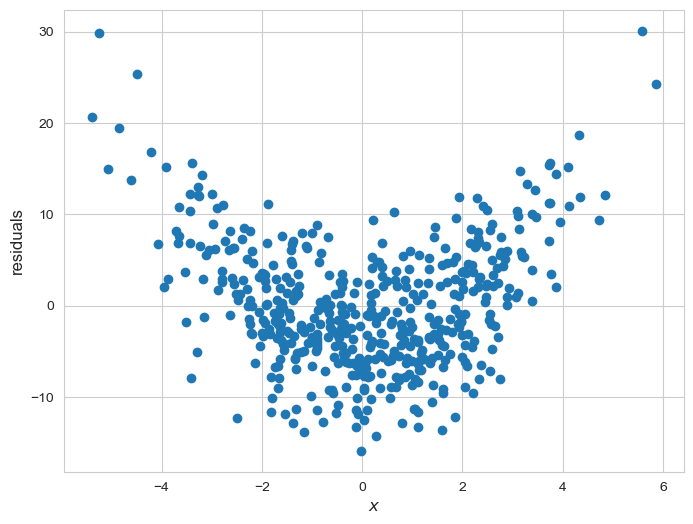

In [7]:
## Make a residual plot
plt.figure(figsize=(8,6))

plt.scatter(x, residuals)

plt.xlabel("$x$", fontsize=12)
plt.ylabel("residuals", fontsize=12)


plt.show()

Residual plots that appear to have a functional relationship with one or more of the features suggest that you have missed some signal in the data with your model (in this synthetic example we know that for a fact). This means we should go back and revise our model and then re-examine the residuals.

In [8]:
## fit the correct model
reg = LinearRegression(copy_X=True)

X = np.zeros((len(x),2))
X[:,0] = x
X[:,1] = x**2

reg.fit(X,y)

residuals = y - reg.predict(X)

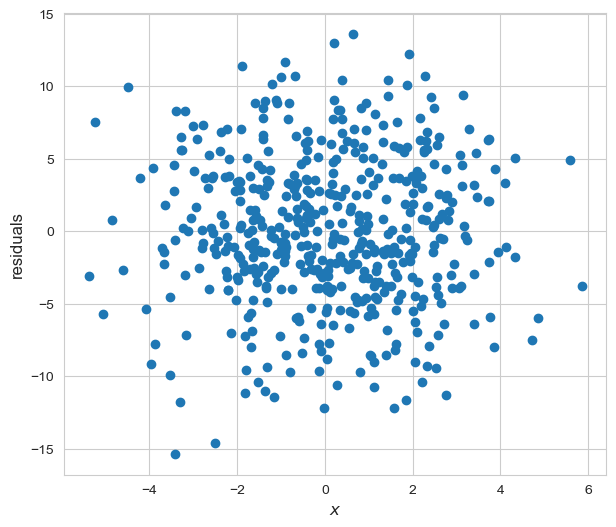

In [9]:
## Make a residual plot
plt.figure(figsize=(7,6))

plt.scatter(x, residuals)

plt.xlabel("$x$", fontsize=12)
plt.ylabel("residuals", fontsize=12)


plt.show()

A residual against feature plot like the one above is what we should expect if our model adequately captures the relationship between $y$ and $X$.

#### Equal variance

Another reason we may look at these plots is for assessing the assumption that the $\epsilon$s come from a distribution with equal variance for all values of $X$.

In [10]:
## Making a data set where epsilon is not
## equal for all values of x
x = np.round(4*np.random.random(500) - 2,2)
epsilons = (x+6)*np.random.randn(500)

y = x + epsilons

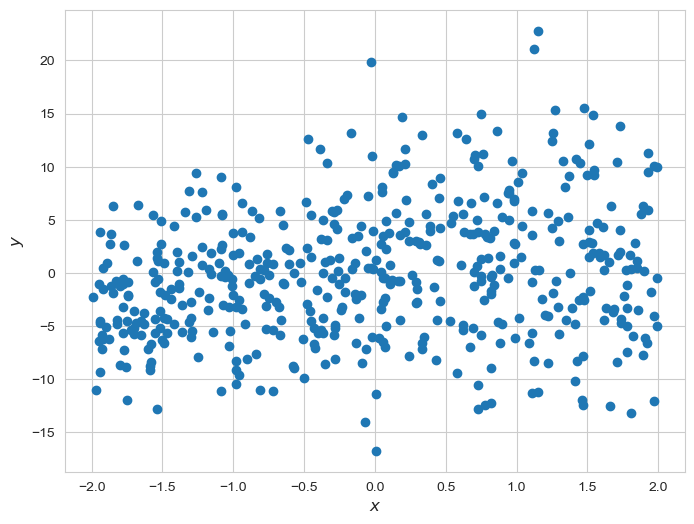

In [11]:
plt.figure(figsize=(8,6))

plt.scatter(x, y)

plt.xlabel("$x$", fontsize=12)
plt.ylabel("$y$", fontsize=12)

plt.show()

In [12]:
slr = LinearRegression(copy_X=True)

slr.fit(x.reshape(-1,1), y)

residuals = y - slr.predict(x.reshape(-1,1))

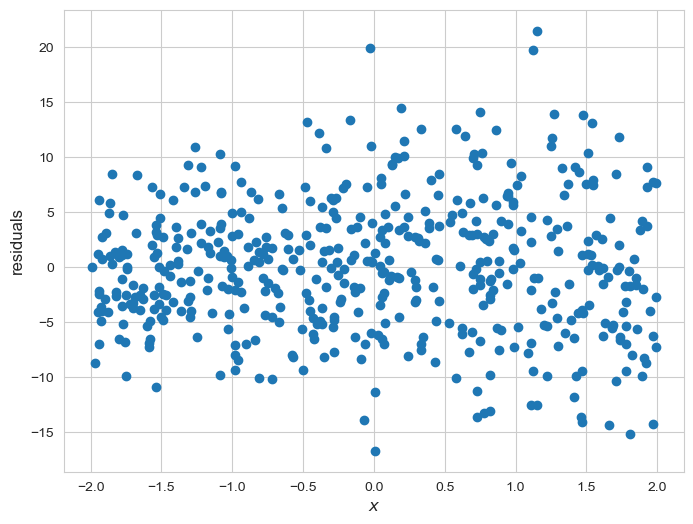

In [13]:
## Make a residual plot
plt.figure(figsize=(8,6))

plt.scatter(x, residuals)


plt.xlabel("$x$", fontsize=12)
plt.ylabel("residuals", fontsize=12)

plt.show()

When you see a funnel shape like this it indicates that the variance of $\epsilon$ is not equal across all values of $X$. While this does not impact the  estimate of the regression line too much, it may still impact our predictions. One approach to such a data set is to use weighted least squares (touched on in a `Practice Problems` notebook).

Note that unequal variances is sometimes referred to as <i>heteroskedasticity</i>.

#### Looking for missed interactions

Another thing that residual plots can be useful for is for identifying missed interaction terms. One pattern that suggests a missed interaction is a sort of X pattern.

In [14]:
X = 4*np.random.random((500,2)) - 2
y = X[:,0] * X[:,1] + .5*np.random.randn(500)

In [15]:
reg = LinearRegression(copy_X=True)

reg.fit(X,y)

residuals = y - reg.predict(X)

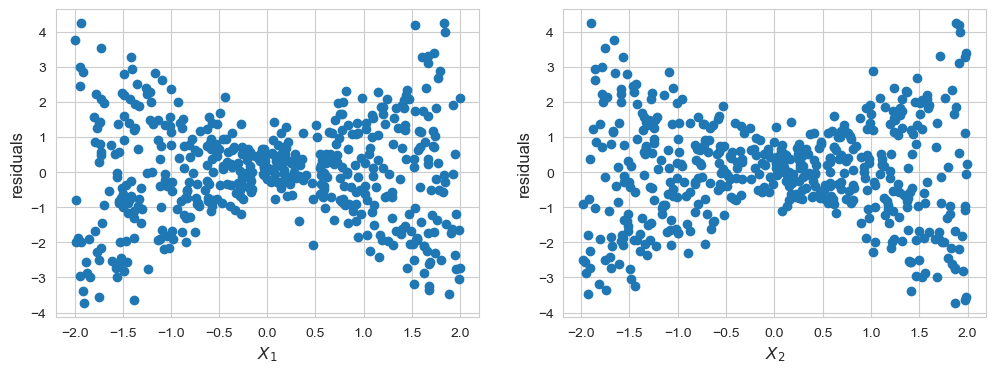

In [16]:
fig,ax = plt.subplots(1,2,figsize=(12,4))


ax[0].scatter(X[:,0], residuals)

ax[0].set_xlabel("$X_1$", fontsize=12)
ax[0].set_ylabel("residuals", fontsize=12)

ax[1].scatter(X[:,1], residuals)

ax[1].set_xlabel("$X_2$", fontsize=12)
ax[1].set_ylabel("residuals", fontsize=12)

plt.show()

Let's add in the interaction term and see what happens!

In [17]:
X_new = np.zeros((500, 3))
X_new[:,:2] = X.copy()
X_new[:,2] = X_new[:,0]*X_new[:,1]

reg = LinearRegression(copy_X=True)

reg.fit(X_new,y)

residuals = y - reg.predict(X_new)

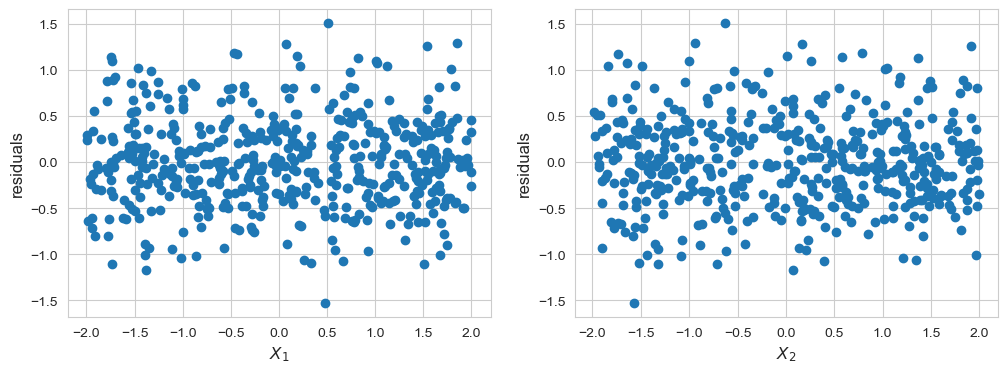

In [18]:
fig,ax = plt.subplots(1,2,figsize=(12,4))


ax[0].scatter(X[:,0], residuals)

ax[0].set_xlabel("$X_1$", fontsize=12)
ax[0].set_ylabel("residuals", fontsize=12)

ax[1].scatter(X[:,1], residuals)

ax[1].set_xlabel("$X_2$", fontsize=12)
ax[1].set_ylabel("residuals", fontsize=12)

plt.show()

### Residual vs. predicted plots

In the case of a handful of features we can look at residual vs. predicted plots like above. However, what is far more common is to look at residual vs. predicted plots, meaning we plot $y-\hat{y}$ against $\hat{y}$.

These plots can be used to diagnose all of the problems we discussed above

#### Missed signal

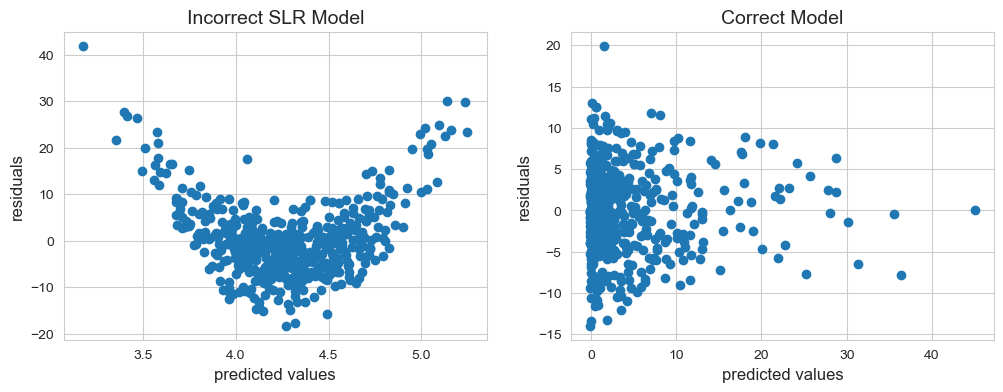

In [19]:
x = 2*np.random.randn(500)
y = x**2 + 5*np.random.randn(500)

slr = LinearRegression(copy_X=True)

slr.fit(x.reshape(-1,1), y)

residuals = y - slr.predict(x.reshape(-1,1))


X = np.zeros((500, 2))
X[:,0] = x
X[:,1] = x**2

## Fit the correct model
reg = LinearRegression(copy_X=True)

reg.fit(X, y)

correct_residuals = y - reg.predict(X)


## Make a residual plot

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].scatter(slr.predict(x.reshape(-1,1)), residuals)

ax[0].set_xlabel("predicted values", fontsize=12)
ax[0].set_ylabel("residuals", fontsize=12)
ax[0].set_title("Incorrect SLR Model", fontsize=14)

ax[1].scatter(reg.predict(X), correct_residuals)

ax[1].set_xlabel("predicted values", fontsize=12)
ax[1].set_ylabel("residuals", fontsize=12)
ax[1].set_title("Correct Model", fontsize=14)


plt.show()

#### Unequal variance

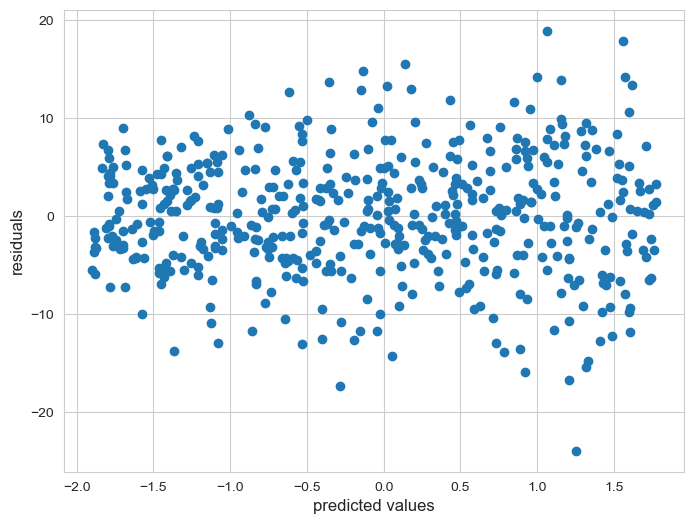

In [20]:
x = np.round(4*np.random.random(500) - 2,2)
epsilons = (x+6)*np.random.randn(500)

y = x + epsilons

slr = LinearRegression(copy_X=True)

slr.fit(x.reshape(-1,1), y)

residuals = y - slr.predict(x.reshape(-1,1))


## Make a residual plot

plt.figure(figsize=(8,6))

plt.scatter(slr.predict(x.reshape(-1,1)), residuals)

plt.xlabel("predicted values", fontsize=12)
plt.ylabel("residuals", fontsize=12)

plt.show()

#### Missed interaction terms

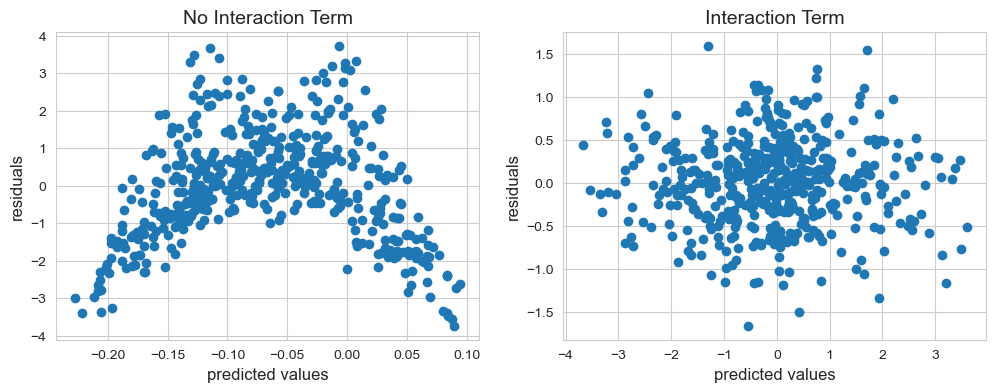

In [21]:
X = 4*np.random.random((500,2)) - 2
y = X[:,0] * X[:,1] + .5*np.random.randn(500)

reg = LinearRegression(copy_X=True)

reg.fit(X,y)

residuals = y - reg.predict(X)


X_new = np.zeros((500, 3))
X_new[:,:2] = X.copy()
X_new[:,2] = X_new[:,0]*X_new[:,1]

correct_reg = LinearRegression(copy_X=True)

correct_reg.fit(X_new,y)

correct_residuals = y - correct_reg.predict(X_new)

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].scatter(reg.predict(X), residuals)

ax[0].set_xlabel("predicted values", fontsize=12)
ax[0].set_ylabel("residuals", fontsize=12)
ax[0].set_title("No Interaction Term", fontsize=14)

ax[1].scatter(correct_reg.predict(X_new), correct_residuals)

ax[1].set_xlabel("predicted values", fontsize=12)
ax[1].set_ylabel("residuals", fontsize=12)
ax[1].set_title("Interaction Term", fontsize=14)

plt.show()



#### Why residuals against predicted?

A natural question (and common mistake that is made) is why not plot residuals against the <i>actual values</i>? Or $y-\hat{y}$ against $y$.

While you may occassioanlly be fine doing this, sometimes looking at this plot can cause you to make mistakes when diagnosing your model. It is never assumed that $\epsilon$ is independent of $y$ in the model set up. So even if you have made the perfect model your residual vs actual plot could still display something that is not just a random blob, leading you to tinker with your already perfect model.

### Major takeaways

- Residual plots can help you make model assessments that can improve inferential or predictive modeling
- Residuals can be plotted against features ($X$) or predicted values ($\hat{y}$)
- In either setting we are looking for a random blob of points that tends to fall between the negative and positive values of some number.

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)